<a href="https://colab.research.google.com/github/NallelyPintor/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification_CrispModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de pacientes con cáncer de mama 


## Entendimiento del Negocio
Se quiere estimar los pacientes con cáncer de mama según datos recolectados previamente


In [ ]:
#imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Entendimiento de los datos

In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474283,8.352692,11.815970,38.040000
Resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


In [ ]:
#verificacion de datos perdidos
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

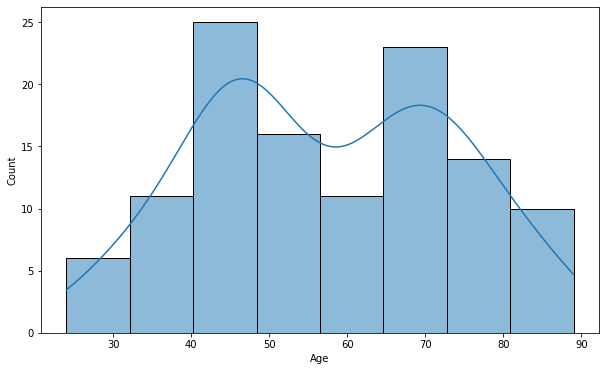

In [ ]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(df.Age , kde = True)

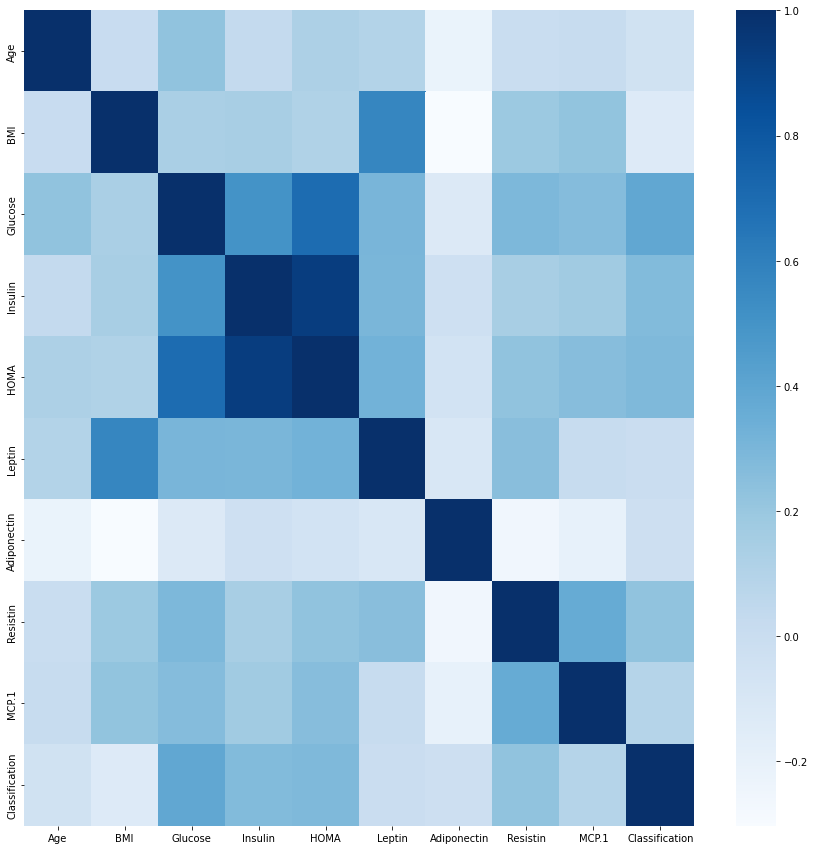

In [ ]:
#matrix de correlacion
plt.figure(figsize= (15 , 15))
sns.heatmap(df.corr(),cmap="Blues")

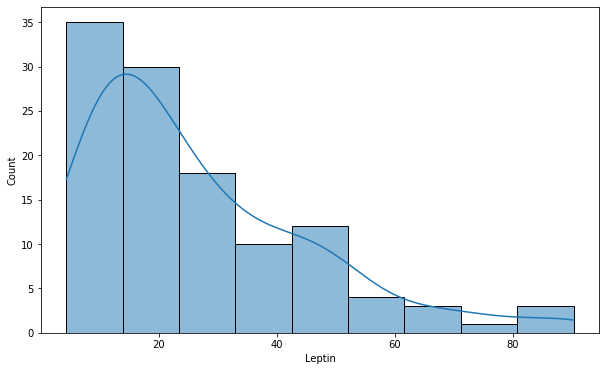

In [ ]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(df.Leptin , kde = True)

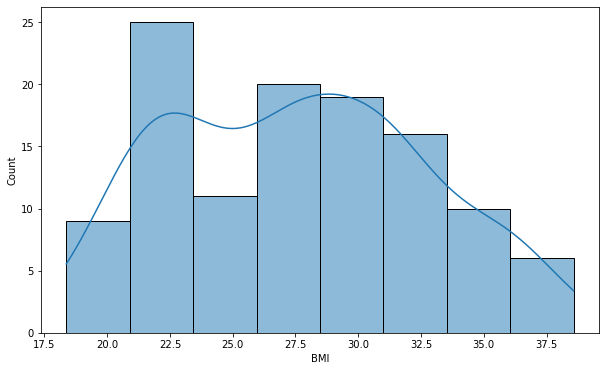

In [ ]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(df.BMI , kde = True)

In [ ]:
#Conocer si las clases estan balanceadas
print(f"Cantidad Personas sanas {len(df[df.Classification==1])}") 
print(f"Cantidad Personas cancer {len(df[df.Classification==2])}") 

Cantidad Personas sanas 52
Cantidad Personas cancer 64


In [ ]:
y = df.Classification
X = df.drop(['Classification'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

##Modelo Regresión Logística

In [ ]:
#entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=20000).fit(X_train,y_train)

In [ ]:
pred_lr = lr.predict(X_test)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.92      0.86      0.89        14

    accuracy                           0.88        24
   macro avg       0.87      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



##Modelo Ramdon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# modificamos max_depth jugamos con el para encontrar una mejor precisión
rfr = RandomForestClassifier(max_depth=100000).fit(X_train, y_train) 

In [ ]:
pred_rfr = rfr.predict(X_test)
print(classification_report(y_test, pred_rfr))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



## Red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
simple_nn = Sequential()
simple_nn.add(InputLayer((9,)))
simple_nn.add(Dense(4, 'relu'))
simple_nn.add(Dense(4, 'relu'))
simple_nn.add(Dense(1, 'sigmoid'))
 
opt = Adam(learning_rate=.1) #optimizador adam con una tasa de aprendizaje de 0.1
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=10)

Epoch 1/10
3/3 [==============================] - 2s 486ms/step - loss: 0.5436 - root_mean_squared_error: 0.7373 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7638
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 0.5435 - root_mean_squared_error: 0.7372 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7638
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.5435 - root_mean_squared_error: 0.7372 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7638
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 0.5435 - root_mean_squared_error: 0.7372 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7638
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 0.5435 - root_mean_squared_error: 0.7372 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7638
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 0.5435 - root_mean_squared_error: 0.7372 - val_loss: 0.5833 - val_root_mean_squared

In [ ]:
pred_rn = simple_nn.predict(X_test)
print(classification_report(y_test,pred_rn))

              precision    recall  f1-score   support

           1       0.42      1.00      0.59        10
           2       0.00      0.00      0.00        14

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24



## Tunning de hiperparámetros

In [ ]:
params_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}

from sklearn.model_selection import GridSearchCV
lr_gs = GridSearchCV(lr, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

best_lr = lr_gs.fit(X_train, y_train) #volvemos a entrenar
# print(f"Best parameters: {best_lr.best_params_}") #mostrar los mejores parametros para 

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [ ]:
y_pred_b = best_lr.predict(X_test)
print(classification_report(y_test, y_pred_b))
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_lr.score(X_test, y_test)))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.92      0.86      0.89        14

    accuracy                           0.88        24
   macro avg       0.87      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



## Conclusión
De acuerdo a las metricas de evaluación obtenidas podemos decir que el modelo de regresión logistica es un buen clasificador para nuestra base de datos.